In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
sns.set_style("darkgrid")

In [4]:
df = pd.read_csv('baseline data.csv')
df2 = pd.read_csv('merged_dataset.csv')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [6]:
liver = df
liver.head()

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
0,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0
1,8458,2,67,0,70.4,168.0,24.884028,14817.0,624,0
2,6298,3,53,1,105.8,186.0,30.453537,3.0,1783,0
3,15398,4,56,1,109.3,170.0,37.830100,6628.0,3143,0
4,13261,5,68,1,NaN,NaN,NaN,1871.0,1836,1


In [7]:
liver.columns

Index(['Unnamed: 0', 'id', 'age', 'male', 'weight', 'height', 'bmi', 'case.id',
       'futime', 'status'],
      dtype='object')

In [8]:
liver.rename(columns={'Unnamed: 0':'Un', 'male':'gender','weight':'weight_kg','height':'height_cm'}, inplace = True)
liver.head()

,Un,id,age,gender,weight_kg,height_cm,bmi,case.id,futime,status
0,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0
1,8458,2,67,0,70.4,168.0,24.884028,14817.0,624,0
2,6298,3,53,1,105.8,186.0,30.453537,3.0,1783,0
3,15398,4,56,1,109.3,170.0,37.830100,6628.0,3143,0
4,13261,5,68,1,NaN,NaN,NaN,1871.0,1836,1


In [9]:
liver.columns

Index(['Un', 'id', 'age', 'gender', 'weight_kg', 'height_cm', 'bmi', 'case.id',
       'futime', 'status'],
      dtype='object')

In [10]:
df = liver.drop(["Un","case.id"],axis=1)
df.head()

,id,age,gender,weight_kg,height_cm,bmi,futime,status
0,1,57,0,60.0,163.0,22.690939,6261,0
1,2,67,0,70.4,168.0,24.884028,624,0
2,3,53,1,105.8,186.0,30.453537,1783,0
3,4,56,1,109.3,170.0,37.830100,3143,0
4,5,68,1,NaN,NaN,NaN,1836,1


In [11]:
df.shape

(17549, 8)

In [12]:
df2.shape

(15204, 7)

In [13]:
#Merging 2 datasets
common_ids = set(df['id']).intersection(set(df2['id']))

In [14]:
df_filtered = df[df['id'].isin(common_ids)]

In [15]:
merged_df = df_filtered.merge(df2, on='id', how='inner')

In [16]:
merged_df.tail(10)

,id,age,gender,weight_kg,height_cm,bmi,futime,status,avg_pre_hdl,avg_post_hdl,avg_total_hdl,avg_pre_chol,avg_post_chol,avg_total_chol
15194,17555,68,1,75.0,170.0,25.951557,1280,0,40.000000,42.000000,41.000000,40.000000,42.000000,41.000000
15195,17556,53,0,123.2,172.0,41.393446,1124,0,44.600000,NaN,44.600000,44.600000,NaN,44.600000
15196,17557,46,1,72.6,167.0,26.013913,1364,0,48.500000,55.333333,52.600000,48.500000,55.333333,52.600000
15197,17558,72,0,106.8,168.0,38.035584,3991,1,62.000000,68.000000,67.076923,62.000000,68.000000,67.076923
15198,17559,62,1,120.0,185.0,35.062089,470,0,48.000000,NaN,48.000000,48.000000,NaN,48.000000
15199,17560,56,0,84.6,159.0,33.296128,628,0,43.750000,NaN,43.750000,43.750000,NaN,43.750000
15200,17562,46,0,53.0,161.0,20.501023,1894,0,55.333333,86.000000,63.000000,55.333333,86.000000,63.000000
15201,17563,52,1,111.8,154.0,47.335905,3841,0,35.058824,34.894737,34.972222,35.058824,34.894737,34.972222
15202,17564,59,0,57.3,NaN,NaN,5081,0,54.600000,NaN,54.600000,54.600000,NaN,54.600000
15203,17566,69,1,94.1,180.0,29.204650,2744,0,39.000000,44.125000,41.562500,39.000000,44.125000,41.562500


In [17]:
df = merged_df
df.head()

,id,age,gender,weight_kg,height_cm,bmi,futime,status,avg_pre_hdl,avg_post_hdl,avg_total_hdl,avg_pre_chol,avg_post_chol,avg_total_chol
0,1,57,0,60.0,163.0,22.690939,6261,0,75.000000,66.750000,68.400000,75.000000,66.750000,68.400000
1,2,67,0,70.4,168.0,24.884028,624,0,74.166667,NaN,74.166667,74.166667,NaN,74.166667
2,3,53,1,105.8,186.0,30.453537,1783,0,55.666667,NaN,55.666667,55.666667,NaN,55.666667
3,4,56,1,109.3,170.0,37.830100,3143,0,48.714286,36.222222,41.687500,48.714286,36.222222,41.687500
4,5,68,1,NaN,NaN,NaN,1836,1,45.500000,44.000000,45.000000,45.500000,44.000000,45.000000


In [18]:
df.shape

(15204, 14)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15204 entries, 0 to 15203
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              15204 non-null  int64  
 1   age             15204 non-null  int64  
 2   gender          15204 non-null  int64  
 3   weight_kg       12125 non-null  float64
 4   height_cm       13586 non-null  float64
 5   bmi             12027 non-null  float64
 6   futime          15204 non-null  int64  
 7   status          15204 non-null  int64  
 8   avg_pre_hdl     13985 non-null  float64
 9   avg_post_hdl    12762 non-null  float64
 10  avg_total_hdl   15204 non-null  float64
 11  avg_pre_chol    13985 non-null  float64
 12  avg_post_chol   12762 non-null  float64
 13  avg_total_chol  15204 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 1.7 MB


In [20]:
df.describe()

,id,age,gender,weight_kg,height_cm,bmi,futime,status,avg_pre_hdl,avg_post_hdl,avg_total_hdl,avg_pre_chol,avg_post_chol,avg_total_chol
count,15204.000000,15204.000000,15204.000000,12125.000000,13586.000000,12027.000000,15204.000000,15204.00000,13985.000000,12762.000000,15204.000000,13985.000000,12762.000000,15204.000000
mean,8792.231123,53.760260,0.457840,86.751348,169.385102,30.210779,2448.695409,0.07748,52.243175,53.348922,52.713798,52.243175,53.348922,52.713798
std,5061.277621,14.114116,0.498236,22.280495,10.121147,7.098583,1561.566587,0.26736,14.888351,17.057529,15.206297,14.888351,17.057529,15.206297
min,1.000000,18.000000,0.000000,33.400000,123.000000,9.207332,7.000000,0.00000,3.000000,13.000000,3.000000,3.000000,13.000000,3.000000
25%,4418.750000,44.000000,0.000000,70.500000,162.000000,25.246400,1180.000000,0.00000,41.500000,41.000000,41.666667,41.500000,41.000000,41.666667
50%,8804.000000,53.000000,0.000000,84.200000,169.000000,29.017523,2197.500000,0.00000,49.900000,50.125000,50.200000,49.900000,50.125000,50.200000
75%,13159.250000,64.000000,1.000000,99.700000,177.000000,33.890430,3388.250000,0.00000,60.750000,62.611538,61.333333,60.750000,62.611538,61.333333
max,17566.000000,98.000000,1.000000,181.700000,215.000000,84.395725,7245.000000,1.00000,179.800000,190.000000,165.777778,179.800000,190.000000,165.777778


In [21]:
df.isnull().sum()

id                   0
age                  0
gender               0
weight_kg         3079
height_cm         1618
bmi               3177
futime               0
status               0
avg_pre_hdl       1219
avg_post_hdl      2442
avg_total_hdl        0
avg_pre_chol      1219
avg_post_chol     2442
avg_total_chol       0
dtype: int64

In [22]:
#Handling missing values of height, weight and BMI
df["gender"].unique()

array([0, 1], dtype=int64)

In [23]:
df['gender'] = df['gender'].replace([0,1],['female','male'])
df.head(2)

,id,age,gender,weight_kg,height_cm,bmi,futime,status,avg_pre_hdl,avg_post_hdl,avg_total_hdl,avg_pre_chol,avg_post_chol,avg_total_chol
0,1,57,female,60.0,163.0,22.690939,6261,0,75.000000,66.75,68.400000,75.000000,66.75,68.400000
1,2,67,female,70.4,168.0,24.884028,624,0,74.166667,NaN,74.166667,74.166667,NaN,74.166667


In [24]:
df['weight_kg'] = df.groupby('gender', group_keys=False)['weight_kg'].apply(lambda x: x.fillna(x.mean())).reset_index(drop=True)
df['height_cm'] = df.groupby('gender', group_keys=False)['height_cm'].apply(lambda x: x.fillna(x.mean())).reset_index(drop=True)
df['bmi'] = df.apply(lambda row: row['weight_kg'] / ((row['height_cm'] / 100) ** 2) if pd.isna(row['bmi']) else row['bmi'], axis=1)

In [25]:
df.isnull().sum()

id                   0
age                  0
gender               0
weight_kg            0
height_cm            0
bmi                  0
futime               0
status               0
avg_pre_hdl       1219
avg_post_hdl      2442
avg_total_hdl        0
avg_pre_chol      1219
avg_post_chol     2442
avg_total_chol       0
dtype: int64

In [26]:
#Now handling the missing values of pre and post hdl and chol values
columns_to_check = ['avg_pre_hdl', 'avg_post_hdl', 'avg_pre_chol', 'avg_post_chol']
df_dropped_missing = df.dropna(subset=columns_to_check)


In [27]:
df_dropped_missing.isnull().sum()

id                0
age               0
gender            0
weight_kg         0
height_cm         0
bmi               0
futime            0
status            0
avg_pre_hdl       0
avg_post_hdl      0
avg_total_hdl     0
avg_pre_chol      0
avg_post_chol     0
avg_total_chol    0
dtype: int64

In [28]:
df = df_dropped_missing
df.shape

(11543, 14)

In [29]:
#Perform one hot encoding 
df = pd.get_dummies(df, columns=['gender'])

In [30]:
df

,id,age,weight_kg,height_cm,bmi,futime,status,avg_pre_hdl,avg_post_hdl,avg_total_hdl,avg_pre_chol,avg_post_chol,avg_total_chol,gender_female,gender_male
0,1,57,60.000000,163.000000,22.690939,6261,0,75.000000,66.750000,68.400000,75.000000,66.750000,68.400000,1,0
3,4,56,109.300000,170.000000,37.830100,3143,0,48.714286,36.222222,41.687500,48.714286,36.222222,41.687500,0,1
4,5,68,95.303713,177.094254,30.387914,1836,1,45.500000,44.000000,45.000000,45.500000,44.000000,45.000000,0,1
5,6,39,63.900000,155.000000,26.615590,1581,0,50.000000,69.000000,57.600000,50.000000,69.000000,57.600000,1,0
6,7,49,66.200000,161.000000,25.519339,3109,0,61.444444,77.583333,70.666667,61.444444,77.583333,70.666667,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15196,17557,46,72.600000,167.000000,26.013913,1364,0,48.500000,55.333333,52.600000,48.500000,55.333333,52.600000,0,1
15197,17558,72,106.800000,168.000000,38.035584,3991,1,62.000000,68.000000,67.076923,62.000000,68.000000,67.076923,1,0
15200,17562,46,53.000000,161.000000,20.501023,1894,0,55.333333,86.000000,63.000000,55.333333,86.000000,63.000000,1,0
15201,17563,52,111.800000,154.000000,47.335905,3841,0,35.058824,34.894737,34.972222,35.058824,34.894737,34.972222,0,1


In [31]:
#columns = ['age','weight_kg','height_cm','bmi','futime','status','avg_pre_hdl','avg_post_hdl','avg_total_hdl','avg_pre_chol',
#         'avg_post_chol','avg_total_chol','gender_male','gender_female']
columns =  ['age','bmi','futime','status','avg_pre_hdl','avg_post_hdl','avg_total_hdl','avg_pre_chol',
         'avg_post_chol','avg_total_chol','gender_male','gender_female']
df = df.loc[:,columns]
#features = ['age','weight_kg','height_cm','bmi','futime','avg_pre_hdl','avg_post_hdl','avg_total_hdl','avg_pre_chol',
#            'avg_post_chol','avg_total_chol','gender_male','gender_female']
features = ['age','bmi','futime','avg_pre_hdl','avg_post_hdl','avg_total_hdl','avg_pre_chol',
            'avg_post_chol','avg_total_chol','gender_male','gender_female']
x = df.loc[:,features]
y = df.loc[:,['status']]

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [32]:
# Import models and utility functions
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

In [33]:
# Setting SEED for reproducibility
SEED = 23
# Instantiate Gradient Boosting Regressor
gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )
# Fit to training set
gbc.fit(x_train, y_train)
 
# Predict on test set
pred_y = gbc.predict(x_test)
 
# accuracy
acc = accuracy_score(y_test, pred_y)
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc))

C:\Users\Isini\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Classifier accuracy is : 0.93


In [34]:
from sklearn.metrics import classification_report
f1 = f1_score(y_test, pred_y)
accuracy = accuracy_score(y_test, pred_y)

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')
print(classification_report(y_test, pred_y))

Accuracy: 0.93
F1 Score: 0.18
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2154
           1       0.53      0.11      0.18       155

    accuracy                           0.93      2309
   macro avg       0.74      0.55      0.57      2309
weighted avg       0.91      0.93      0.91      2309



https://www.analyticsvidhya.com/blog/2021/09/gradient-boosting-algorithm-a-complete-guide-for-beginners/

## hyperparameter tuning

from sklearn.model_selection import GridSearchCV
parameters =[{"learning_rate":[1, 0.5, 0.25, 0.1, 0.05, 0.01],
"max_depth":[1,2,3,4,5,6,7,8,9,10],
"min_samples_split":[0.1,0.2,0.3],
"min_samples_leaf":[0.1,0.2,0.3,0.4],
"max_features":[1,2,3,4,5,6,7]}]
grid_search= GridSearchCV(estimator=gbc,param_grid=parameters,scoring='accuracy',cv=3,n_jobs=-1,verbose=10)
grid_search = grid_search.fit(x_train, y_train)

accuracy = grid_search.best_score_
accuracy

grid_search.best_params_

In [35]:
gbc_tuned = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=6,
                                min_samples_leaf=0.1,
                                min_samples_split=0.1,
                                max_depth=2)

In [36]:
gbc_tuned.fit(x_train, y_train)
pred_y = gbc_tuned.predict(x_test)

C:\Users\Isini\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
f1 = f1_score(y_test, pred_y)
accuracy = accuracy_score(y_test, pred_y)

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')
print(classification_report(y_test, pred_y))

Accuracy: 0.93
F1 Score: 0.01
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2154
           1       0.25      0.01      0.01       155

    accuracy                           0.93      2309
   macro avg       0.59      0.50      0.49      2309
weighted avg       0.89      0.93      0.90      2309



# SMOTE

In [38]:
#Performing SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [39]:
# Create and train a Random Forest classifier on the resampled data
gb_classifier_resampled = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )
gb_classifier_resampled.fit(x_train_resampled, y_train_resampled)


C:\Users\Isini\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=300,
                           random_state=100)

In [40]:
# Make predictions on the original test data
y_pred = gb_classifier_resampled.predict(x_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.85
F1 Score: 0.33


In [41]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)

Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91      2154
           1       0.23      0.55      0.33       155

    accuracy                           0.85      2309
   macro avg       0.60      0.71      0.62      2309
weighted avg       0.92      0.85      0.88      2309



In [42]:
cm = confusion_matrix(y_test, y_pred)

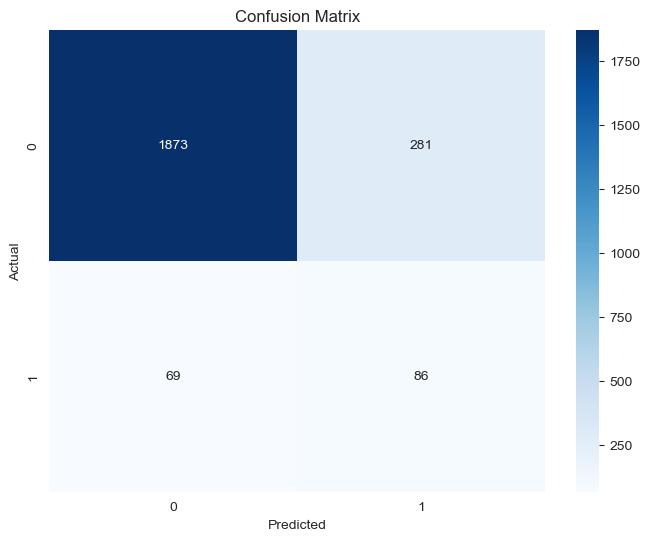

In [48]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [49]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.678493126067032

learning_rate
N_estimators
max_depth
min_samples_split
min_samples_leaf
max_features

## learning_rate

learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, "b", label="Train AUC")
line2, = plt.plot(learning_rates, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("learning rate")
plt.show()

## n_estimators

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   model = GradientBoostingClassifier(n_estimators=estimator)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

## max_depth

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   model = GradientBoostingClassifier(max_depth=max_depth)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label="Train AUC")
line2, = plt.plot(max_depths, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

## min_samples_split

min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   model = GradientBoostingClassifier(min_samples_split=min_samples_split)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, "b", label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples split")
plt.show()

## min_samples_leaf

min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   model = GradientBoostingClassifier(min_samples_leaf=min_samples_leaf)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, "b", label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples leaf")
plt.show()

## max_features

max_features = list(range(1,x_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   model = GradientBoostingClassifier(max_features=max_feature)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, "b", label="Train AUC")
line2, = plt.plot(max_features, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("max features")
plt.show()

In [50]:
# Create and train a Random Forest classifier on the resampled data
gb_classifier_resampled = GradientBoostingClassifier(n_estimators=100,
                                 learning_rate=0.5,
                                 random_state=100,
                                 max_features=6,
                                min_samples_split=0.2,
                                  min_samples_leaf=0.1,
                                max_depth=5)
gb_classifier_resampled.fit(x_train_resampled, y_train_resampled)

C:\Users\Isini\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.5, max_depth=5, max_features=6,
                           min_samples_leaf=0.1, min_samples_split=0.2,
                           random_state=100)

In [51]:
# Make predictions on the original test data
y_pred = gb_classifier_resampled.predict(x_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.83
F1 Score: 0.28


In [52]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)

Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.85      0.90      2154
           1       0.20      0.50      0.28       155

    accuracy                           0.83      2309
   macro avg       0.58      0.68      0.59      2309
weighted avg       0.91      0.83      0.86      2309



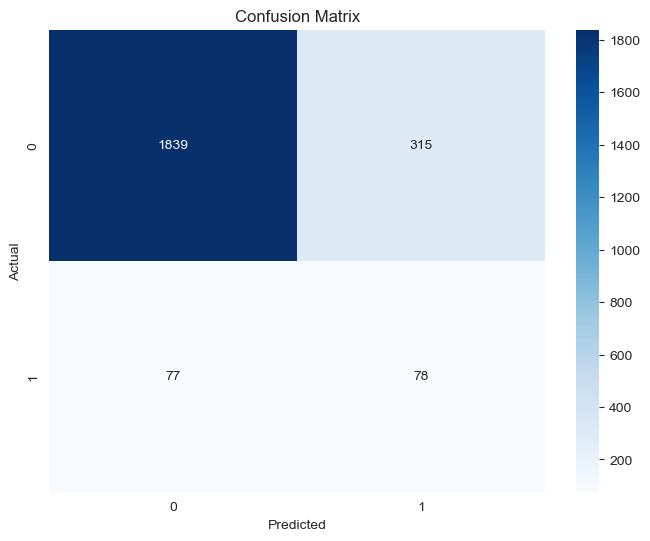

In [53]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

from sklearn.model_selection import GridSearchCV
parameters =[{"learning_rate":[1, 0.5, 0.25, 0.1, 0.05, 0.01],
"max_depth":[1,2,3,4,5,6,7,8,9,10],
"min_samples_split":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
"min_samples_leaf":[0.1,0.2,0.3,0.4],
"max_features":[1,2,3,4,5,6,7]}]
grid_search= GridSearchCV(estimator=gb_classifier_resampled,param_grid=parameters,scoring='accuracy',cv=4,n_jobs=-1,verbose=10)
grid_search = grid_search.fit(x_train_resampled, y_train_resampled)

accuracy = grid_search.best_score_
accuracy

grid_search.best_params_

# Create and train a Random Forest classifier on the resampled data
gb_classifier_resampled = GradientBoostingClassifier(n_estimators=100,
                                 learning_rate=1,
                                 random_state=100,
                                 max_features=7,
                                min_samples_split=0.1,
                                  min_samples_leaf=0.1,
                                max_depth=6)
gb_classifier_resampled.fit(x_train_resampled, y_train_resampled)

# Make predictions on the original test data
y_pred = gb_classifier_resampled.predict(x_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')

accuracy = accuracy_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')
print(f'Accuracy: {accuracy:.2f}')
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [54]:
# Create and train a Random Forest classifier on the resampled data
gb_classifier_resampled = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )
gb_classifier_resampled.fit(x_train_resampled, y_train_resampled)

C:\Users\Isini\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=300,
                           random_state=100)

In [55]:
# Make predictions on the original test data
y_pred = gb_classifier_resampled.predict(x_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.85
F1 Score: 0.33


In [56]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)

Accuracy: 0.85
F1 Score: 0.33
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91      2154
           1       0.23      0.55      0.33       155

    accuracy                           0.85      2309
   macro avg       0.60      0.71      0.62      2309
weighted avg       0.92      0.85      0.88      2309



# Pickle file

In [64]:
import pickle

In [65]:
pickle.dump(gb_classifier_resampled, open('model.pkl','wb'))

In [66]:
model = pickle.load(open('model.pkl','rb'))

# FLASK

In [67]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


In [68]:
x_test.columns

Index(['age', 'bmi', 'futime', 'avg_pre_hdl', 'avg_post_hdl', 'avg_total_hdl',
       'avg_pre_chol', 'avg_post_chol', 'avg_total_chol', 'gender_male',
       'gender_female'],
      dtype='object')

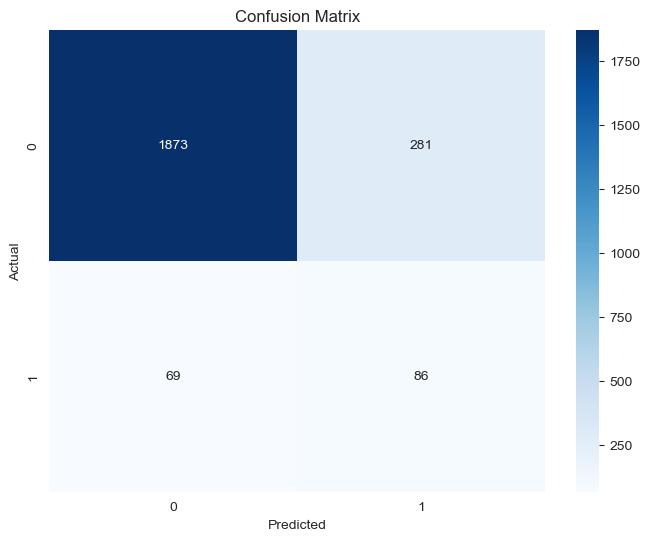

In [57]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [58]:
# Get feature importances
feature_importances = gb_classifier_resampled.feature_importances_

# Match feature importances to feature names (assuming you have a feature list)
feature_names = x_train.columns  # Replace with your feature names
importance_dict = dict(zip(feature_names, feature_importances))

# Sort features by importance
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print feature importance
for feature, importance in sorted_importance:
    print(f'{feature}: {importance:.4f}')


age: 0.4315
gender_male: 0.2005
gender_female: 0.1995
futime: 0.0677
avg_post_hdl: 0.0289
bmi: 0.0261
avg_post_chol: 0.0190
avg_pre_hdl: 0.0078
avg_total_hdl: 0.0070
avg_total_chol: 0.0061
avg_pre_chol: 0.0059


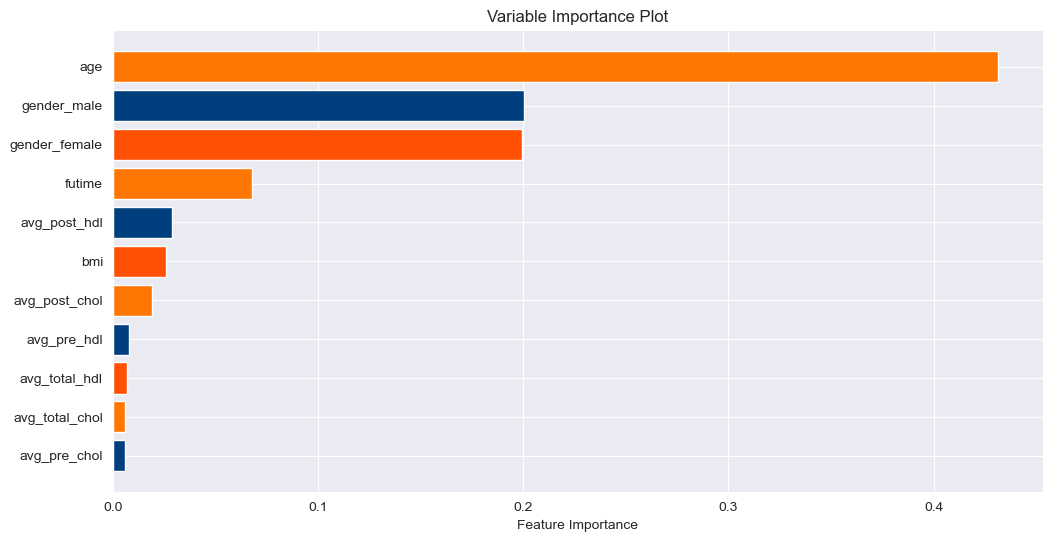

In [59]:
#VIP Plot
#VIP
import matplotlib.pyplot as plt
feature_importance = gb_classifier_resampled.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], 
align='center',color=['#003F7D','#FD7702','#FF5003'])
plt.yticks(pos, 
np.array(x_test.columns.values.tolist())[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Variable Importance Plot')
plt.show()

In [60]:
pip show scikit-learn

Name: scikit-learn
Version: 1.2.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\isini\anaconda3\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: daal4py, imbalanced-learn, prince, scikit-learn-intelex
Note: you may need to restart the kernel to use updated packages.


In [61]:
from sklearn.inspection import PartialDependenceDisplay

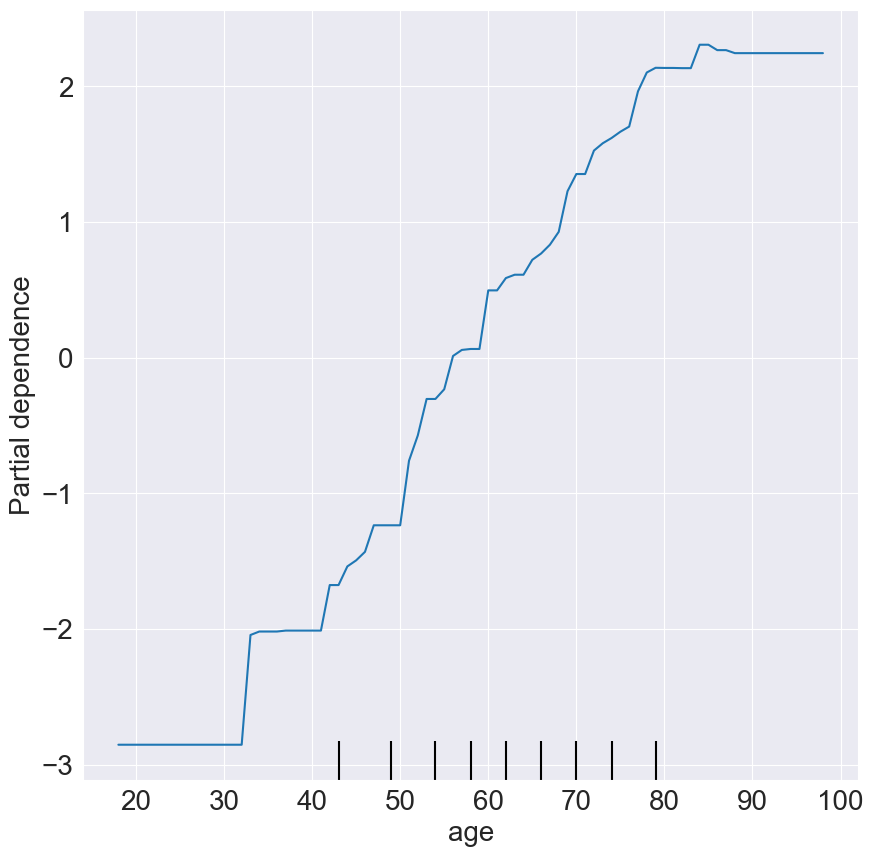

In [62]:
features = [0]
fig, ax = plt.subplots(figsize=(10,10))
plt.rc('font', size=20)
one=PartialDependenceDisplay.from_estimator(gb_classifier_resampled, x_train_resampled, features,ax=ax)
plt.savefig('0.png',dpi=300)

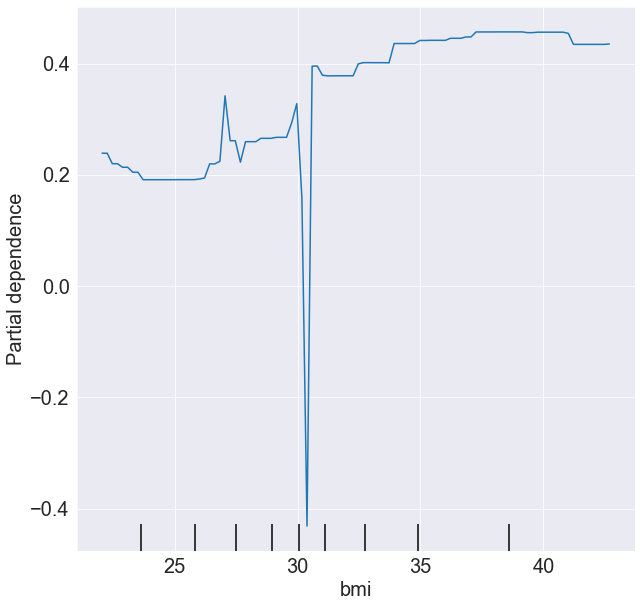

In [56]:
features = [1]
fig, ax = plt.subplots(figsize=(10,10))
plt.rc('font', size=20)
one=PartialDependenceDisplay.from_estimator(gb_classifier_resampled, x_train_resampled, features,ax=ax)
plt.savefig('1.png',dpi=300)

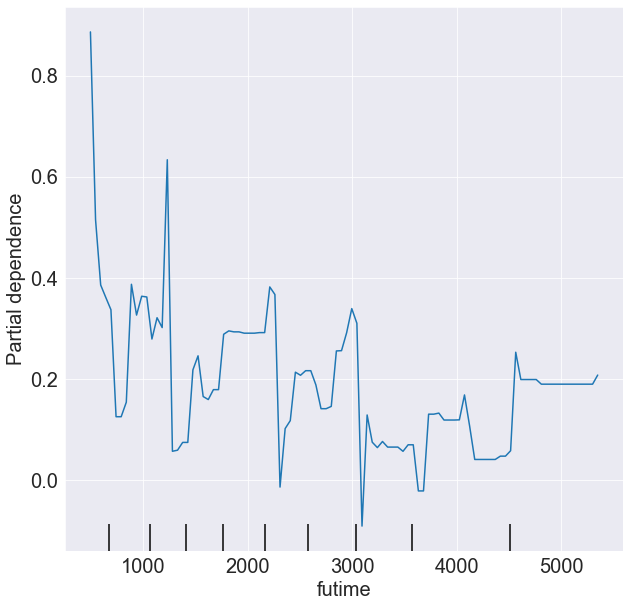

In [57]:
features = [2]
fig, ax = plt.subplots(figsize=(10,10))
plt.rc('font', size=20)
one=PartialDependenceDisplay.from_estimator(gb_classifier_resampled, x_train_resampled, features,ax=ax)
plt.savefig('2.png',dpi=300)

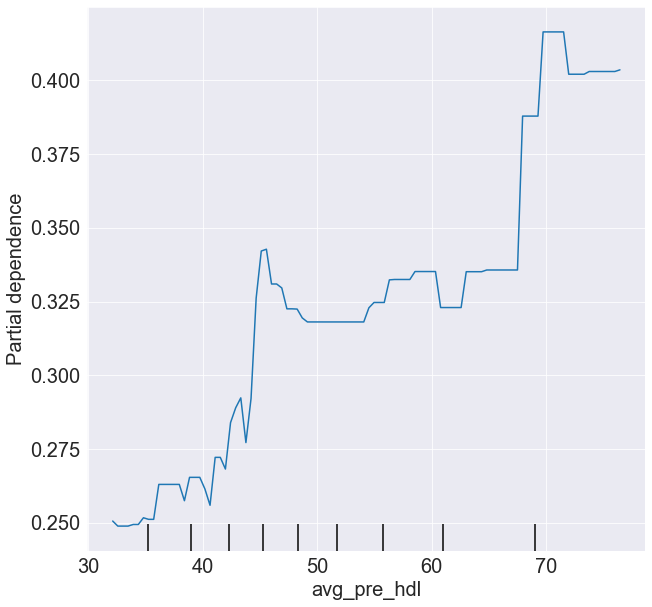

In [58]:
features = [3]
fig, ax = plt.subplots(figsize=(10,10))
plt.rc('font', size=20)
one=PartialDependenceDisplay.from_estimator(gb_classifier_resampled, x_train_resampled, features,ax=ax)
plt.savefig('3.png',dpi=300)

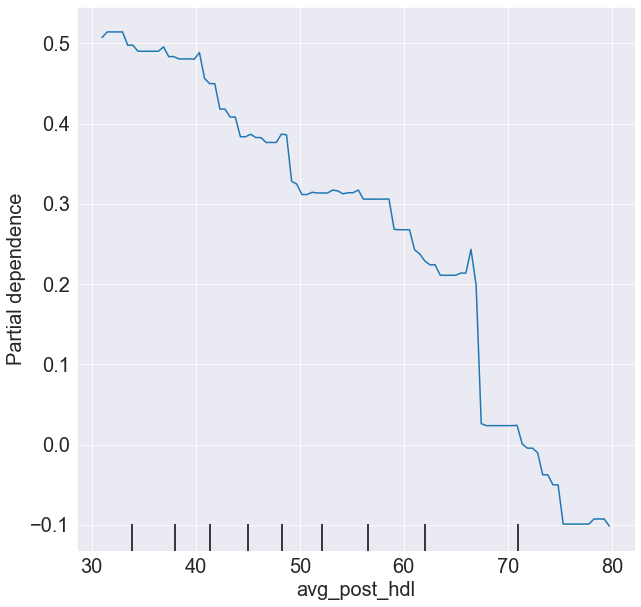

In [65]:
features = [4]
fig, ax = plt.subplots(figsize=(10,10))
plt.rc('font', size=20)
one=PartialDependenceDisplay.from_estimator(gb_classifier_resampled, x_train_resampled, features,ax=ax)
plt.savefig('4.png',dpi=300)

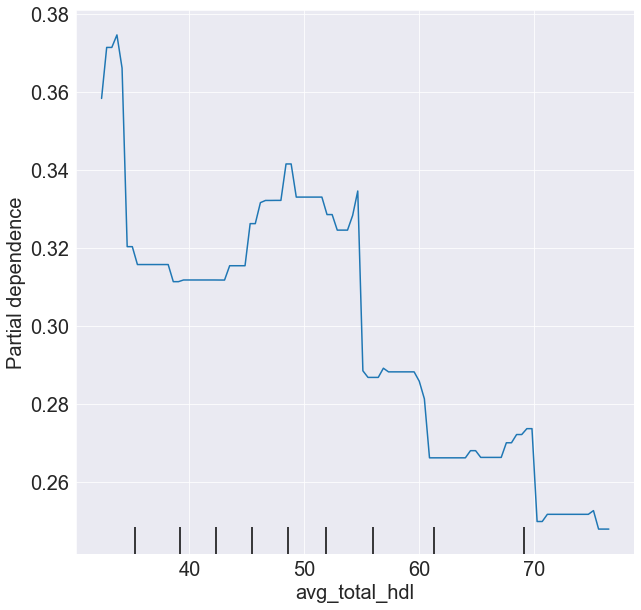

In [59]:
features = [5]
fig, ax = plt.subplots(figsize=(10,10))
plt.rc('font', size=20)
one=PartialDependenceDisplay.from_estimator(gb_classifier_resampled, x_train_resampled, features,ax=ax)
plt.savefig('5.png',dpi=300)

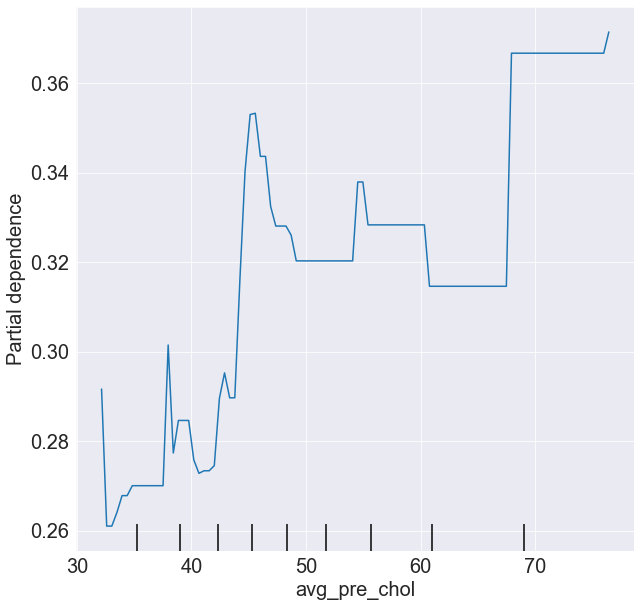

In [60]:
features = [6]
fig, ax = plt.subplots(figsize=(10,10))
plt.rc('font', size=20)
one=PartialDependenceDisplay.from_estimator(gb_classifier_resampled, x_train_resampled, features,ax=ax)
plt.savefig('6.png',dpi=300)

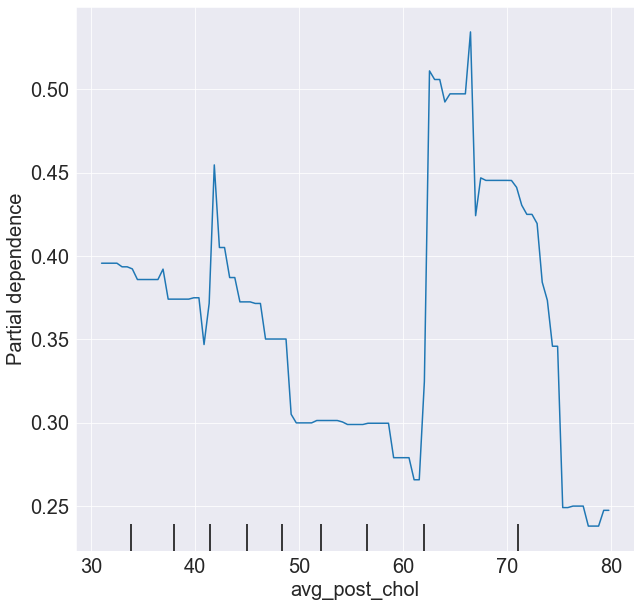

In [61]:
features = [7]
fig, ax = plt.subplots(figsize=(10,10))
plt.rc('font', size=20)
one=PartialDependenceDisplay.from_estimator(gb_classifier_resampled, x_train_resampled, features,ax=ax)
plt.savefig('7.png',dpi=300)

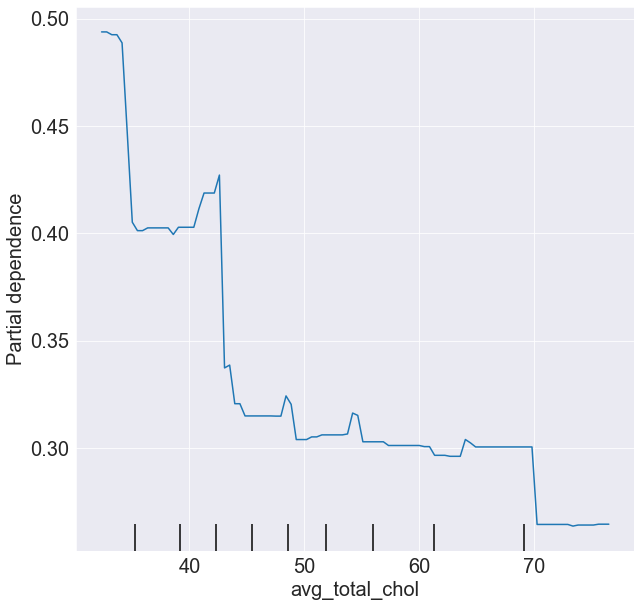

In [62]:
features = [8]
fig, ax = plt.subplots(figsize=(10,10))
plt.rc('font', size=20)
one=PartialDependenceDisplay.from_estimator(gb_classifier_resampled, x_train_resampled, features,ax=ax)
plt.savefig('8.png',dpi=300)